# Übung 2 Detektion von Verkehrsschildern

**German Traffic Sign Detection Benchmark**

Detallierte Beschreibung des Datensatzes siehe unter folgendem [Link](http://benchmark.ini.rub.de/?section=gtsdb&subsection=news)

## Imports

In [1]:
import os

import csv
import wget
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [2]:
# Testfunktion für ipywidgets: 
# Es soll ein Slider angezeigt werden. Der Wertebereich des Sliders
# soll zwischen -10(min) und 30(max) liegen. 
# Entsprechend der Sliderposition soll ein Ergebniswert angezeigt werden.
def f(x):
    return 3 * x
interact(f, x= 10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

## Globale Variablen

Um hartcodierte Bezeichner/Namen in den Funktionen zu vermeiden, definiere an dieser Stelle alle Variablen, die global verwendet werden.

In [3]:
# Definiere den Pfad zum heruntergeladenen Datenordner
DATA_PATH = "../dataset/FullIJCNN2013"

# Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
assert os.path.exists(DATA_PATH), "Der angegebene Pfad existriert nicht."

In [4]:
# Definiere den Pfad zur Datei gt.txt
"""
TIPP: arbeite zuerst mit der Datei new_gt.txt, um den Rechenaufwand bei dem Aufruf 
der Funktion calculate_hough_cirles() zu reduzieren.
Diese Datei enthält wenige Bilder mit meist gut sichtbaren Verkehrszeichen 

"""
### TO DO ###
# Definiere den Pfad zur gt.txt-Datei / zur new_gt.txt-Datei

GT_TXT_PATH = os.path.join(DATA_PATH, "new_gt.txt")
assert os.path.exists(GT_TXT_PATH), "Der angegebene Pfad existriert nicht."

In [5]:
# 把图标分成3类，prohibitory, mandatory, danger class

# Prohibitory Class IDs
PROHIBITORY_CLASS_IDs = [ 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 16]

# Mandatory Class IDs
MANDATORY_CLASS_IDs = [ 33, 34, 35, 36, 37, 38, 39, 40 ]

# Danger Class IDs
DANGER_CLASS_IDs = [ 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31 ]

In [6]:
# MANDATORY-Dictionary 
MANDATORY_DICT = {}

# MANDATORY images (filenames) list
MANDATORY_IMG_LIST = []

# MANDATORY filepaths
MANDATORY_FILEPATHS = []

## Aufgabe 1 - Aussortieren bestimmter Verkehrsschilder

In [7]:
def calculate_mandatory():

    """
    Sortiert Verkehrszeichen nach der Kategorie „mandatory“ und speichert 
    die Ergebnisse in ein Dictionary.
    Das Dictionary beinhaltet Dateinamen als Schlüssel und Listen von 
    Ground Thruth ROIs-Listen als Values.
    """
    
    # Setze prohibitory dictionary zurück
    MANDATORY_DICT.clear()
    
    # Öffne die gt.txt-Datei / new_gt.txt-Datei
    with open(GT_TXT_PATH, newline='') as csvfile:
        gt_reader = csv.reader(csvfile, delimiter=';')
        
        # Bau eine Schleife, um die Daten Zeile für Zeile auszulesen 
        # und die entsprechende Liste der ROIs für die Datei zu füllen
        for row in gt_reader:
            ### TO DO ###
            # alternative
            # MANDATORY_DICT[row[0]] = [list(np.asarray(row[1:6],int))]
            if int(row[5]) in MANDATORY_CLASS_IDs:
                MANDATORY_DICT[row[0]] = [list(map(int, row[1:6]))]


In [8]:
# Funktionsaufruf
"""
Erwartete Ausgabe:
    {'00002.ppm': [[892, 476, 1006, 592, 39]],
     '00039.ppm': [[953, 252, 1015, 313, 35]],
     '00040.ppm': [[1040, 310, 1130, 400, 33]],
     '00066.ppm': [[569, 483, 618, 535, 38]],
     '00074.ppm': [[383, 527, 421, 569, 38]],
     '00081.ppm': [[233, 499, 249, 521, 38]],
     ...}
"""
calculate_mandatory()
print(MANDATORY_DICT)

{'00002.ppm': [[892, 476, 1006, 592, 39]], '00039.ppm': [[953, 252, 1015, 313, 35]], '00040.ppm': [[1040, 310, 1130, 400, 33]], '00066.ppm': [[569, 483, 618, 535, 38]], '00074.ppm': [[383, 527, 421, 569, 38]], '00081.ppm': [[233, 499, 249, 521, 38]], '00083.ppm': [[1071, 297, 1142, 368, 40]], '00115.ppm': [[330, 523, 351, 545, 38]], '00163.ppm': [[753, 473, 825, 545, 38]], '00214.ppm': [[1214, 241, 1288, 312, 33]], '00255.ppm': [[183, 503, 260, 581, 38]], '00262.ppm': [[894, 282, 953, 341, 36]], '00279.ppm': [[617, 484, 673, 540, 38]], '00304.ppm': [[504, 385, 553, 434, 35]], '00410.ppm': [[367, 615, 423, 671, 38]], '00411.ppm': [[185, 602, 238, 662, 38]], '00491.ppm': [[430, 568, 488, 637, 38]], '00501.ppm': [[107, 637, 216, 748, 38]], '00503.ppm': [[354, 579, 423, 650, 38]], '00556.ppm': [[1195, 499, 1253, 557, 38]], '00612.ppm': [[127, 521, 218, 612, 38]], '00624.ppm': [[387, 505, 434, 554, 38]], '00655.ppm': [[544, 520, 564, 540, 38]], '00679.ppm': [[720, 409, 759, 450, 33]], '0068

In [9]:
# Ermittele die Dateienamen (ausgehend von DATA_PATH) alle Treffer in MANDATORY_DICT

MANDATORY_FILEPATHS.clear()
for key in MANDATORY_DICT.keys():
    MANDATORY_FILEPATHS.append(os.path.join(DATA_PATH, key))

print(len(MANDATORY_FILEPATHS))
print(MANDATORY_FILEPATHS)

37
['../dataset/FullIJCNN2013/00002.ppm', '../dataset/FullIJCNN2013/00039.ppm', '../dataset/FullIJCNN2013/00040.ppm', '../dataset/FullIJCNN2013/00066.ppm', '../dataset/FullIJCNN2013/00074.ppm', '../dataset/FullIJCNN2013/00081.ppm', '../dataset/FullIJCNN2013/00083.ppm', '../dataset/FullIJCNN2013/00115.ppm', '../dataset/FullIJCNN2013/00163.ppm', '../dataset/FullIJCNN2013/00214.ppm', '../dataset/FullIJCNN2013/00255.ppm', '../dataset/FullIJCNN2013/00262.ppm', '../dataset/FullIJCNN2013/00279.ppm', '../dataset/FullIJCNN2013/00304.ppm', '../dataset/FullIJCNN2013/00410.ppm', '../dataset/FullIJCNN2013/00411.ppm', '../dataset/FullIJCNN2013/00491.ppm', '../dataset/FullIJCNN2013/00501.ppm', '../dataset/FullIJCNN2013/00503.ppm', '../dataset/FullIJCNN2013/00556.ppm', '../dataset/FullIJCNN2013/00612.ppm', '../dataset/FullIJCNN2013/00624.ppm', '../dataset/FullIJCNN2013/00655.ppm', '../dataset/FullIJCNN2013/00679.ppm', '../dataset/FullIJCNN2013/00682.ppm', '../dataset/FullIJCNN2013/00685.ppm', '../data

In [10]:
def render_mandatory_rois():
    """
    Malt die ROIs (Rechtecke) auf die entsprechenden Bilder und speichert 
    die in MANDATORY_IMG_LIST. 
    Hinweis:
    Die ROIs und Bildernamen können aus MANDATORY_DICT ermittelt werden
    """
    # Setze die globale variable zurück
    MANDATORY_IMG_LIST.clear()
    
    for key in MANDATORY_DICT.keys():
        file_path = os.path.join(DATA_PATH, key)
        img = plt.imread(file_path)
        ### TO DO ###
        for idx in range(len(MANDATORY_DICT[key])): # warum?
            # Berechne Koordinaten des Rechtecks
            point1 = (MANDATORY_DICT[key][0][0], MANDATORY_DICT[key][0][1])
            point2 = (MANDATORY_DICT[key][0][2], MANDATORY_DICT[key][0][3])

            # Zeichne das Rechteck
            img = cv2.rectangle(img, point1, point2, color= (0, 0, 255) ,thickness = 2)
            org = (MANDATORY_DICT[key][0][2] + 10,MANDATORY_DICT[key][0][1] + 20)
            # Speichere Verkehrszeichennamen als text
            text = "ID: " + str(MANDATORY_DICT[key][0][4])
            img = cv2.putText(img, org = org, text = text, fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale= 0.7, color = (255, 0, 0), thickness = 2)

        MANDATORY_IMG_LIST.append(img)

In [11]:
# Mandatory Image list abrufen
render_mandatory_rois()
print(len(MANDATORY_IMG_LIST))

37


In [12]:
def show_img(idx):
    plt.figure(figsize=(16,8))
    plt.imshow(MANDATORY_IMG_LIST[idx])
    plt.show()

In [13]:
interact(show_img, idx=widgets.IntSlider(min=0,max=len(MANDATORY_IMG_LIST)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=36), Output()), _dom_classes=('widget-interact…

## Aufgabe 2 – Formbasierter Ansatz


Hier kannst du die Links abrufen, die zum Implementieren dieser Funktion nützlich sein können:

- <https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html>
- <https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html>
- <https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html>

Übersicht der Tutorials: <https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html>

In [14]:
def calculate_hough_cirles(filepaths, d_p, min_dist, param1, param2, min_radius, max_radius):
    """
     Berechnet Hough Circles unter Berücksichtigung der Form der Verkehrszeichen
    """
    
    # Liste fuer die Speicherung des Ergebnis
    result = []
    predicted_dict = {}
    
    for filepath_ in filepaths:
        # Lade das Bild in
        color_img = cv2.imread(filepath_, cv2.IMREAD_COLOR)
        ### TO DO ###
        
        # Konvertiere das BGR-Bild in Gray.
        # https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html
        img_gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

        # Reduziere das Rauschen 
        # https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html --> Kapitel "Image bluring"

        img_blurred = cv2.blur(img_gray,(5,5))
        
        # Ermittele die Kreisen auf dem Bild 
        # https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html
        circles = cv2.HoughCircles(image = img_blurred,method = cv2.HOUGH_GRADIENT, dp = d_p, minDist = min_dist,
                            param1 = param1, param2 = param2, minRadius = min_radius, maxRadius = max_radius)
        '''
        image: 霍夫变换的输入图像应为8位的灰度图像
        method: 检测方法，上述代码使用梯度法检测
        dp: 累加面分辨率（大小） = 原始图像分辨率（大小） × 1/dp
        minDist: 两个圆心之间的最小距离。若两圆心距离 < minDist，则认为是同一个圆
        param1: Canny 边缘检测的高阈值， 默认100
        param2： 累加平面某点是否是圆心的判定阈值。它越大，能通过检测的圆就更接近完美的圆形，默认为100
        minRadius： 圆半径的最小值。默认为 0
        maxRadius： 圆半径的最大值，默认为 0

        输出为描述圆的(1,n,3)数组，第三维度每行有三个数[a,b,r],用来描述圆心位置的(a, b)和圆半径r
        如果出现error: (-215:Assertion failed)有可能是图像没有正确读取
        '''

        # Kreise auf das Bild malen
        if circles is not None: 
            # Kreise-Paramater in interger umwandeln
            # circles = np.uint16(np.around(circles))
            circles = np.asarray(np.around(circles),int) # to avoid runtimeWarning
            
            # Kreise auf das Bild malen
            for point in circles[0, :]: 
                a, b, r = point
                ''' point = [a, b, r]，其中圆心是(a,b),半径是r '''

                cv2.circle(color_img,(a, b),r,(0,255,0),2) # (B,G,R)

                cv2.circle(color_img,(a, b),2,(0,0,255),3) # 可选， 画圆心，半径为2像素，线宽3像素

                # Ermittle Koordinaten der Rechtecke, die für die Evaluation benutzt werden
                # 用于求出Aufgabe3中的IOU
                point1 = (a-r, b-r)
                point2 = (a+r, b+r)

                # OPTIONAL: Rechtecke auf das Bild malen
                cv2.rectangle(color_img, point1, point2, color= (0, 0, 255) ,thickness = 2)
                if os.path.split(filepath_)[-1] in predicted_dict:
                    if a==0 and b==0 and r==0:
                        continue
                    predicted_dict[os.path.split(filepath_)[-1]].append([point1[0], point1[1], point2[0], point2[1]])
                else: 
                    predicted_dict[os.path.split(filepath_)[-1]] = []
                    if a==0 and b==0 and r==0:
                        continue
                    predicted_dict[os.path.split(filepath_)[-1]].append([point1[0], point1[1], point2[0], point2[1]])
        else:
            predicted_dict[os.path.split(filepath_)[-1]] = []                
        result.append(color_img)
        
    return result, predicted_dict

In [15]:
pred_imgs_form, predicted_rect_rois = calculate_hough_cirles(MANDATORY_FILEPATHS, 
                                                  d_p= 1,
                                                  min_dist = 120 ,
                                                  param1= 100,
                                                  param2= 44,
                                                  min_radius= 5,
                                                  max_radius= 56)
# print(predicted_rect_rois)

In [16]:
def show_img_form(idx):
    plt.figure(figsize=(16,8))
    plt.imshow(cv2.cvtColor(pred_imgs_form[idx], cv2.COLOR_BGR2RGB))
    plt.show()

In [17]:
interact(show_img_form, idx=widgets.IntSlider(min=0, max=len(pred_imgs_form)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=36), Output()), _dom_classes=('widget-interact…

## Aufgabe 3 – Optimierung und Evaluation des formbasierten Ansatzes

In [18]:
def jaccard_similarity(pred, gr_truth):
    '''
    Berechnet den Jaccard-Koeffizienten für zwei Rechtecke: den vorhergesagen (pred) und den ground_truth (gr_truth)
    '''

    # Ermittle die (x, y)-Koordinaten der Schnittmenge beider Rechtecke
    ''' 第一个参数是通过霍夫变换输出的预测值， 第二个参数是gt_txt里的真实值，取最大值'''
    x_i1 = max(pred[0], gr_truth[0])
    y_i1 = max(pred[1], gr_truth[1])
    x_i2 = min(pred[2], gr_truth[2])
    y_i2 = min(pred[3], gr_truth[3])

    inter_area = max(0, x_i2 - x_i1 + 1) * max(0, y_i2 - y_i1 + 1)

    pred_area = (pred[2] - pred[0] + 1) * (pred[3] - pred[1] + 1)
    gr_truth_area = (gr_truth[2] - gr_truth[0] + 1) * (gr_truth[3] - gr_truth[1] + 1)
    
    iou = inter_area / float(pred_area + gr_truth_area - inter_area)
    '''
    IOU(Intersection over Union) = Area of overlap / Area of Union
    交并比 (IOU)，又称雅卡尔指数 (Jaccard index)
    '''
    
    # Gebe den "Intersection Over Union"-Wert zurück
    return iou

In [19]:
def evaluate_detection(ground_truth_dict, predicted_dict, similarity_threshold=0.6):    
    '''
    Evaluiert implementierte Ansätze anhand des Jaccard-Ähnlichkeitsmaßes
    Referenz für die Berechnung: Houben et. al. Kapitel IV Evaluation Procedure
    '''

    # True Positives
    tp = 0
    # False Positives
    fp = 0
    # False Negatives
    fn = 0
    
    for key in ground_truth_dict.keys():
        # Liste mit allen ROIs eines Dateinamens 
        rois_gt_lists = ground_truth_dict[key] # 一个图像上所有的真实roi
        
        # Berechne Jaccard-Ähnlichkeitsmaß von detektierten Rechtecken, die aus den Kreiskoordinaten ermittelt wurden
        rois_pred_lists = predicted_dict[key] # 同一个图像上的所有预测的roi
        
        if len(rois_pred_lists) > 0: # 如果有预测结果
            for rois_gt_list in rois_gt_lists: # 一个真实roi和一波预测roi对比
                iou = [jaccard_similarity(rois_pred, rois_gt_list) for rois_pred in rois_pred_lists] # 包含所有预测roi和一个真实roi的iou列表

                # Liste mit den Werten, die kleiner als similarity_threshold sind
                iou_lt_threshold = [value for value in iou if value < similarity_threshold] # 小于阈值的iou的列表

                fp = fp + len(iou_lt_threshold) # 小于阈值的全算作fp
                
                # Liste mit den Werten, die größer / gleich similarity_threshold sind
                iou_gt_threshold = [value for value in iou if value >= similarity_threshold] # 大于等于阈值的iou的列表，有可能是空列表，有可能会有很多个，但是都只能算一个tp

                # print("ious of picture {} are: {} ".format(key,iou))
                # print("ious of picture {} which less than threshold are: {} ".format(key, iou_lt_threshold))
                # print("ious of picture {} which greater than threshold are: {} \n".format(key, iou_gt_threshold))


                if len(iou_gt_threshold) > 0 : # 如果有iou大于阈值，即被认为是tp的话
                    tp = tp + 1
                else:
                    fn = fn + 1 # 这个真实的roi被算作fn，它属于正样本

        else:
            fn = fn + len(rois_gt_lists) # 没有预测结果的话就加上这个图的所有正样本，他们属于fn
            # print(f"in picture {key} no sign was predicted \n")

    return tp, fp, fn            

In [20]:
def calculate_precision_recall(tp, fp, fn):
    '''
    Berechnet Precision- und Recall-Werte
    '''
    
    # precision = math.NaN
    precision = float('nan')
    if tp + fp != 0:
        precision = tp / (tp + fp)   
    
    # recall = math.NaN
    recall = float('nan')
    if tp + fn != 0:
        recall = tp / (tp + fn)
        
    return precision, recall

In [21]:
# similarity_threshold entspricht dem Schwellenwert im Paper von Houben et. al.
# tp_form, fp_form, fn_form = evaluate_detection(MANDATORY_DICT, predicted_rect_rois, similarity_threshold=0.6)

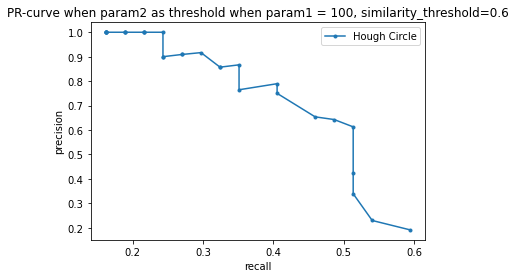

In [24]:
# Precision-Recall-Plot
### TO DO ###
# reference: https://blog.csdn.net/catscanner/article/details/111517938

precision_list = []
recall_list = []

for value in range(100,40,-2):
    pred_imgs_form, predicted_rect_rois = calculate_hough_cirles(MANDATORY_FILEPATHS, 
                                                  d_p= 1,
                                                  min_dist = 120 ,
                                                  param1= 100,
                                                  param2= value,
                                                  min_radius= 5,
                                                  max_radius= 56)
    
    tp_form, fp_form, fn_form = evaluate_detection(MANDATORY_DICT, predicted_rect_rois, similarity_threshold= 0.6)
    precision, recall = calculate_precision_recall(tp_form, fp_form, fn_form)
    precision_list.append(precision)
    recall_list.append(recall)

plt.figure()
plt.plot(recall_list, precision_list, marker = '.', label='Hough Circle')
plt.title("PR-curve when param2 as threshold when param1 = 100, similarity_threshold=0.6")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()